In [19]:
import sys

import gymnasium as gym
import gymnasium
import numpy as np
import pandas as pd

sys.modules["gym"] = gymnasium
from sb3_contrib.ars import ARS
from stable_baselines3.sac import SAC
from stable_baselines3.common.evaluation import evaluate_policy

from antrl.experiments import evaluate_model
from antrl.plot import plot_deaths, plot_mean_and_std

import matplotlib.pyplot as plt

from pathlib import Path

## Healthy reward

In [10]:
h100_result = evaluate_model('_out/ars_d60_t20_h1_5M.zip', ARS, seed = 19, n_eval_episodes = 100)
h095_result = evaluate_model('_out/ars_d60_t20_h095_5M.zip', ARS, seed = 19, n_eval_episodes = 100)
h090_result = evaluate_model('_out/ars_d60_t20_h090_5M.zip', ARS, seed = 19, n_eval_episodes = 100)

c:\users\barto\devel\repos\pycharmprojects\antrl\venv\lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(
c:\users\barto\devel\repos\pycharmprojects\antrl\venv\lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(
c:\users\barto\devel\repos\pycharmprojects\antrl\venv\lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified epis

C:\Users\barto\Devel\Repos\PycharmProjects\AntRL\antrl\plot.py:14: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, el in death_index.iteritems():
C:\Users\barto\Devel\Repos\PycharmProjects\AntRL\antrl\plot.py:14: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, el in death_index.iteritems():
C:\Users\barto\Devel\Repos\PycharmProjects\AntRL\antrl\plot.py:14: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, el in death_index.iteritems():


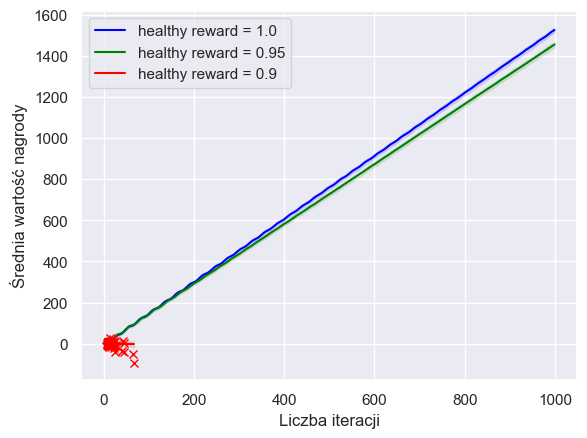

In [16]:
_, ax = plt.subplots()
plot_mean_and_std(h100_result.episode_rewards, ax, color = 'blue', label = 'healthy reward = 1.0')
plot_mean_and_std(h095_result.episode_rewards, ax, color = 'green', label = 'healthy reward = 0.95')
plot_mean_and_std(h090_result.episode_rewards, ax, color = 'red', label = 'healthy reward = 0.9')
plot_deaths(h100_result.episode_rewards, ax, color = 'blue')
plot_deaths(h095_result.episode_rewards, ax, color = 'green')
plot_deaths(h090_result.episode_rewards, ax, color = 'red')
plt.legend()

In [11]:
results = [h100_result, h095_result, h090_result]
healthy_result = pd.DataFrame(
	data = {
		'Healthy reward': [1.0, 0.95, 0.9],
		'Mean reward': [np.mean(r.mean_reward) for r in results],
		'Reward std dev': [np.std(r.mean_reward) for r in results]
	}
)
healthy_result.to_csv('_out/healthy-result.csv', index = False)
healthy_result

,Healthy reward,Mean reward,Reward std dev
0,1.00,1525.936642,13.014267
1,0.95,1455.377984,12.757959
2,0.90,-1.877743,14.390764


## Delta and top

In [12]:
plot_params = [
	(60, 10, 'blue'),
	(60, 20, 'green'),
	(60, 30, 'red'),
	(40, 20, 'yellow')
]

plot_data = []
ars_params_results = {
	'Delta': [], 'Top': [], 'Mean reward': [], 'Reward std dev': []
}

for delta, top, color in plot_params:
	eval_result = evaluate_model(f'_out/ars_d{delta}_t{top}_h1_5M.zip', ARS, seed = 19, n_eval_episodes = 100)
	ars_params_results['Delta'].append(delta)
	ars_params_results['Top'].append(top)
	ars_params_results['Mean reward'].append(np.mean(eval_result.mean_reward))
	ars_params_results['Reward std dev'].append(np.std(eval_result.mean_reward))
	plot_data.append((eval_result.episode_rewards, color))

c:\users\barto\devel\repos\pycharmprojects\antrl\venv\lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(
c:\users\barto\devel\repos\pycharmprojects\antrl\venv\lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(
c:\users\barto\devel\repos\pycharmprojects\antrl\venv\lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified epis

C:\Users\barto\Devel\Repos\PycharmProjects\AntRL\antrl\plot.py:14: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, el in death_index.iteritems():
C:\Users\barto\Devel\Repos\PycharmProjects\AntRL\antrl\plot.py:14: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, el in death_index.iteritems():
C:\Users\barto\Devel\Repos\PycharmProjects\AntRL\antrl\plot.py:14: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, el in death_index.iteritems():
C:\Users\barto\Devel\Repos\PycharmProjects\AntRL\antrl\plot.py:14: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, el in death_index.iteritems():


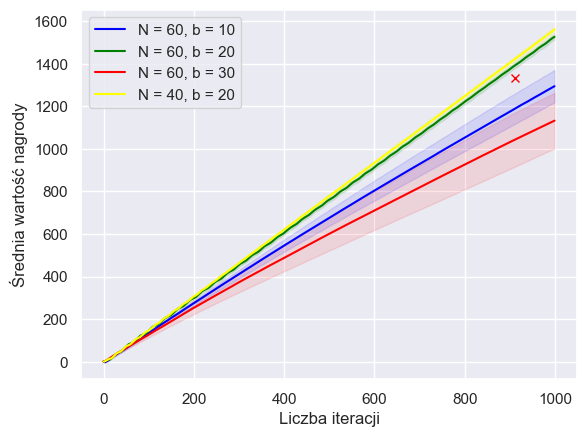

In [18]:
labels = ['N = 60, b = 10', 'N = 60, b = 20', 'N = 60, b = 30', 'N = 40, b = 20']

_, ax = plt.subplots()

for (df, color), label in zip(plot_data, labels):
	plot_mean_and_std(df, ax, color = color, label = label)
	plot_deaths(df, ax, color = color)

plt.legend()

In [22]:
ars_params_df = pd.DataFrame(data = ars_params_results)
ars_params_df.to_csv('_out/ars-params.csv', index = False)
ars_params_df

,Delta,Top,Mean reward,Reward std dev
0,60,10,1293.977258,76.499644
1,60,20,1525.936642,13.014267
2,60,30,1132.130452,130.447038
3,40,20,1559.918688,15.180523


## Reward / speed comparison

In [5]:
model_files = [
	'ars_d60_t20_h1_2M',
	'ars_d60_t20_h1_3.5M',
	'ars_d60_t20_h1_5M',
	'sac_h01_120k',
	'sac_h01_200k',
	'sac_h01_350k'
]

reward_speed_data = {
	'Algorytm': ['ARS'] * 3 + ['SAC'] * 3,
	'Liczba iteracji': ['2 000 000', '3 500 000', '5 000 000', '120 000', '200 000', '350 000'],
	'Czas uczenia [s]': [1781, 3138, 4465, 1748, 2932, 5210],
	'Mean reward': [],
	'Reward std dev': []
}

for model_file in model_files:
	env = gym.make('Ant-v4')
	env.reset(seed = 19)
	model_cls = ARS if 'ars' in model_file else SAC
	model = model_cls.load(f'_out/{model_file}.zip', env)
	mean_reward, reward_std = evaluate_policy(model, env, n_eval_episodes = 100)
	reward_speed_data['Mean reward'].append(mean_reward)
	reward_speed_data['Reward std dev'].append(reward_std)

reward_speed_df = pd.DataFrame(data = reward_speed_data)
reward_speed_df.to_csv('_out/reward-speed.csv', index = False)
reward_speed_df

c:\users\barto\devel\repos\pycharmprojects\antrl\venv\lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


,Algorytm,Liczba iteracji,Czas uczenia [s],Mean reward,Reward std dev
0,ARS,2 000 000,1781,696.911285,438.454458
1,ARS,3 500 000,3138,872.108416,465.313774
2,ARS,5 000 000,4465,1525.936642,13.014267
3,SAC,120 000,1748,253.493477,274.049859
4,SAC,200 000,2932,2620.348589,1537.262120
5,SAC,350 000,5210,4495.457676,531.215630


In [9]:
reward_speed_df['Reward / Time'] = reward_speed_df['Mean reward'] / reward_speed_df['Czas uczenia [s]']
reward_speed_df = reward_speed_df.sort_values(by = 'Reward / Time', ascending = False)
reward_speed_df.to_csv('_out/reward-speed.csv', index = False)
reward_speed_df

,Algorytm,Liczba iteracji,Czas uczenia [s],Mean reward,Reward std dev,Reward / Time
4,SAC,200 000,2932,2620.348589,1537.262120,0.893707
5,SAC,350 000,5210,4495.457676,531.215630,0.862852
0,ARS,2 000 000,1781,696.911285,438.454458,0.391303
2,ARS,5 000 000,4465,1525.936642,13.014267,0.341755
1,ARS,3 500 000,3138,872.108416,465.313774,0.277919
3,SAC,120 000,1748,253.493477,274.049859,0.145019


## Video

In [23]:
models = [
	'ars_d60_t20_h1_5M', 'ars_d60_t10_h1_5M', 'ars_d60_t10_h1_5M',
	'ars_d40_t20_h1_5M', 'ars_d60_t20_h095_5M', 'ars_d60_t20_h090_5M'
]
model_paths = [Path(f'_out/{m}.zip') for m in models]

for model_path in model_paths:
	env = gym.make('Ant-v4', render_mode = 'rgb_array_list')
	env = gym.wrappers.RecordVideo(
		env, './_out/videos', episode_trigger = lambda e: True, name_prefix = model_path.stem
	)

	obs, info = env.reset(seed = 19)
	model = ARS.load(model_path, env = env)
	for i in range(1000):
		action, _states = model.predict(obs)
		obs, rewards, dones, info, _ = env.step(action)
		env.render()

	env.close()

c:\users\barto\devel\repos\pycharmprojects\antrl\venv\lib\site-packages\gymnasium\wrappers\record_video.py:75: UserWarning: WARN: Overwriting existing videos at C:\Users\barto\Devel\Repos\PycharmProjects\AntRL\_out\videos folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video C:\Users\barto\Devel\Repos\PycharmProjects\AntRL\_out\videos\ars_d60_t20_h1_5M-episode-0.mp4.
Moviepy - Writing video C:\Users\barto\Devel\Repos\PycharmProjects\AntRL\_out\videos\ars_d60_t20_h1_5M-episode-0.mp4



TypeError: must be real number, not NoneType